# 2: Train Dataset

In [1759]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns



class TrainDataset:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()
    
    def load_data(self):
        data = pd.read_csv(self.file_path)
        return data
    
    def clean_data(self):
        self.data.dropna(inplace=True)
    
    def get_data_info(self):
        print("Data Information:")
        self.data.info()
    
    def explore_data(self):
        print("First few rows of the data:")
        print(self.data.head())
        print("-" * 70)
        
        
        print("\nInformation about the dataset:")
        print(self.data.info())
        print("-" * 70)
        
       
        print("\nSummary statistics:")
        print(self.data.describe())
        print("-" * 70)
        
        
        print("\nNumber of unique values in each column:")
        print(self.data.nunique())
        print("-" * 70)
        
        
        print("\nColumns with missing values:")
        print(self.data.isnull().sum())
        print("-" * 70)
    
    def get_most_common_station(self):
        station_counts = self.data['station'].value_counts()
        most_common_station = station_counts.idxmax()
        count = station_counts.max()
        print(f"The train picked most passengers from station '{most_common_station}' with a count of {count}.")
        return most_common_station, count
    
    def identify_outliers(self, threshold=3):
        numerical_cols = ['age', 'fare', 'sibsp', 'parch']
        outliers_dict = {}
        
        for col in numerical_cols:
            
            mean = self.data[col].mean()
            std_dev = self.data[col].std()
            
            lower_bound = mean - threshold * std_dev
            upper_bound = mean + threshold * std_dev
            
            outliers = self.data[(self.data[col] < lower_bound) | (self.data[col] > upper_bound)]
            
            outliers_dict[col] = outliers
        
        return outliers_dict
    
    def clean_outliers(self, outliers_dict):
        
        for col, outliers in outliers_dict.items():
            if not outliers.empty:
                
                self.data = self.data[~self.data.index.isin(outliers.index)]
        return self.data
    
    def partition_data(self):
        
        train_data, test_data = train_test_split(self.data,train_size=0.7, test_size=0.3, random_state=12345)
        return train_data, test_data
    
    def preprocess_data(self, X_train, X_test):
       
        categorical_features = ['sex', 'station']
        
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ],
            remainder='passthrough'
        )
        
        
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)
        
        
        scaler = StandardScaler()
        X_train_transformed = scaler.fit_transform(X_train_transformed)
        X_test_transformed = scaler.transform(X_test_transformed)
        
        return X_train_transformed, X_test_transformed
    
    def train_knn_model(self, k_range, X_train, y_train, X_test, y_test):
        
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_train_encoded = encoder.fit_transform(X_train)
        X_test_encoded = encoder.transform(X_test)

        
        training_accuracy = []
        test_accuracy = []

        
        neighbors_settings = range(1, 10)
        for n_neigh in neighbors_settings:
            modelfit = KNeighborsClassifier(n_neighbors=n_neigh)  # Use KNeighborsClassifier directly
            modelfit.fit(X_train_encoded, y_train)
            training_accuracy.append(modelfit.score(X_train_encoded, y_train))
            test_accuracy.append(modelfit.score(X_test_encoded, y_test))
        
        plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
        plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("No of KNN")
        plt.legend()
        
    def train_knn_best_model(self, X_train, y_train, X_test, y_test):
        
        best_k = 7
    
        
        knn_model = KNeighborsClassifier(n_neighbors=best_k)
        knn_model.fit(X_train, y_train)
    
       
        train_accuracy = knn_model.score(X_train, y_train)
        test_accuracy = knn_model.score(X_test, y_test)
        print("KNN Train set accuracy:", train_accuracy)
        print("KNN Test set accuracy:", test_accuracy)
        
    def build_logistic_regression_model(self, X_train, y_train):
        
        model = LogisticRegression(random_state=12345)
        
        model.fit(X_train, y_train)
        
        return model
    
    def evaluate_model(self, model, X_train, y_train, X_test, y_test):
       
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        
        print(f"Training set accuracy: {train_accuracy:.4f}")
        print(f"Testing set accuracy: {test_accuracy:.4f}")
        
        return train_accuracy, test_accuracy
    
    def find_ideal_tree_depth(self, X_train, y_train, X_test, y_test, max_depth_range):
       
        tree_training_accuracy = []
        tree_test_accuracy = []

        for td in max_depth_range:
            tree_mod = DecisionTreeClassifier(max_depth=td, random_state=8)
            tree_mod.fit(X_train, y_train)
            tree_training_accuracy.append(tree_mod.score(X_train, y_train))
            tree_test_accuracy.append(tree_mod.score(X_test, y_test))
        
        plt.plot(max_depth_range, tree_training_accuracy, label="Training Accuracy")
        plt.plot(max_depth_range, tree_test_accuracy, label="Test Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Depth of Tree")
        plt.legend()
        plt.show()
        return tree_test_accuracy
    
    def train_decision_tree(self, X_train, y_train, max_depth=5):
        
        decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
        decision_tree.fit(X_train, y_train)
        return decision_tree
    def evaluate_model_decision(self, model, X_train, X_test, y_train, y_test, tree_test_accuracy):
   
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        print("Decision Tree Accuracy:")
        print(f"Training set accuracy: {train_accuracy:.4f}")
        print(f"Testing set accuracy: {test_accuracy:.4f}")

       
        max_test_accuracy_index = tree_test_accuracy.index(max(tree_test_accuracy))

      
        ideal_tree_depth = max_depth_range[max_test_accuracy_index]

        return ideal_tree_depth
    
    def visualize_data(self):
        
        plt.figure(figsize=(10, 6))
        sns.countplot(x='pclass', data=self.data, palette='pastel')
        plt.title('Count of Passengers by Class', fontsize=16)
        plt.xlabel('Passenger Class', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        plt.figure(figsize=(10, 6))
        self.data['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
        plt.title('Survival Proportion', fontsize=16)
        plt.ylabel('')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

        
        plt.figure(figsize=(10, 6))
        sns.countplot(x='sex', data=self.data, palette='colorblind')
        plt.title('Count of Passengers by Sex', fontsize=16)
        plt.xlabel('Sex', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.countplot(x='station', data=self.data, palette='Set3')
        plt.title('Count of Passengers by Station', fontsize=16)
        plt.xlabel(' Station', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


    
   
        

    

In [1747]:
file_path = ("TrainData.csv") 
train_dataset = TrainDataset(file_path)
print("First few rows of the data:")
print(train_dataset.data.head())


First few rows of the data:
   survived  pclass     sex   age  sibsp  parch     fare station
0         0       3    male  22.0      1      0   7.2500       S
1         1       1  female  38.0      1      0  71.2833       C
2         1       3  female  26.0      0      0   7.9250       S
3         1       1  female  35.0      1      0  53.1000       S
4         0       3    male  35.0      0      0   8.0500       S


In [1748]:
train_dataset.get_data_info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   station   889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# 1. Clean the data and remove any unwanted records. How many records do you have now?


In [1749]:
train_dataset.clean_data()
print(f"Number of records after cleaning: {len(train_dataset.data)}")


Number of records after cleaning: 712


# 2.The train picked most passengers from which station ?

In [1750]:
most_common_station, count = train_dataset.get_most_common_station()


The train picked most passengers from station 'S' with a count of 554.


# 3.Do some basic data exploration (e.g. using commands as head( ), info( ), describe( ), nunique( ), etc).


In [1751]:
train_dataset.explore_data()


First few rows of the data:
   survived  pclass     sex   age  sibsp  parch     fare station
0         0       3    male  22.0      1      0   7.2500       S
1         1       1  female  38.0      1      0  71.2833       C
2         1       3  female  26.0      0      0   7.9250       S
3         1       1  female  35.0      1      0  53.1000       S
4         0       3    male  35.0      0      0   8.0500       S
----------------------------------------------------------------------

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null  

# 4.Are there any outliers in the data? If yes, treat them

In [1752]:
threshold = 3  

outliers_dict = train_dataset.identify_outliers(threshold)

print("\nOutliers identified in each column:")
for col, outliers in outliers_dict.items():
    print(f"Column: {col}")
    print(outliers)


Outliers identified in each column:
Column: age
     survived  pclass   sex   age  sibsp  parch    fare station
630         1       1  male  80.0      0      0  30.000       S
851         0       3  male  74.0      0      0   7.775       S
Column: fare
     survived  pclass     sex   age  sibsp  parch      fare station
27          0       1    male  19.0      3      2  263.0000       S
88          1       1  female  23.0      3      2  263.0000       S
118         0       1    male  24.0      0      1  247.5208       C
258         1       1  female  35.0      0      0  512.3292       C
299         1       1  female  50.0      0      1  247.5208       C
311         1       1  female  18.0      2      2  262.3750       C
341         1       1  female  24.0      3      2  263.0000       S
377         0       1    male  27.0      0      2  211.5000       C
380         1       1  female  42.0      0      0  227.5250       C
438         0       1    male  64.0      1      4  263.0000       

In [1753]:
train_dataset.clean_outliers(outliers_dict)

print("\nData information after cleaning outliers:")
train_dataset.get_data_info()


Data information after cleaning outliers:
Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  655 non-null    int64  
 1   pclass    655 non-null    int64  
 2   sex       655 non-null    object 
 3   age       655 non-null    float64
 4   sibsp     655 non-null    int64  
 5   parch     655 non-null    int64  
 6   fare      655 non-null    float64
 7   station   655 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 46.1+ KB


# 5. Partition the data into a training set (with 70% of the observations), and testing set (with 30% of the observations) using the random state of 12345 for cross validation. 

In [1754]:
train_data, test_data = train_dataset.partition_data()
print(f"Number of records in training set: {len(train_data)}")
print(f"Number of records in testing set: {len(test_data)}")

Number of records in training set: 458
Number of records in testing set: 197


# 6. On the partitioned data, build the best KNN model. Show the accuracy numbers. (Hint: What is the best value of k? How do you decide the ‘best k’?)

In [1755]:
X_train_transformed, X_test_transformed = train_dataset.preprocess_data(train_data.drop('survived', axis=1), test_data.drop('survived', axis=1))
y_train = train_data['survived']
y_test = test_data['survived']


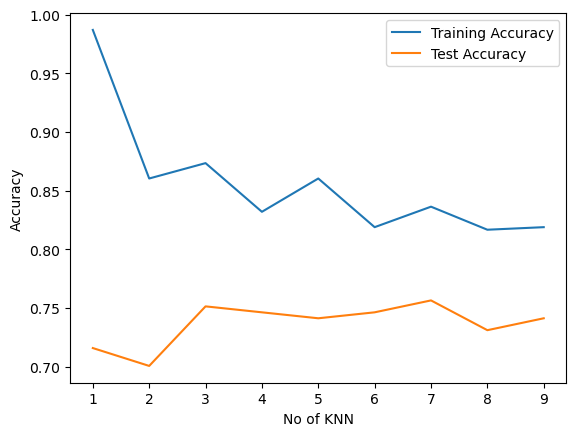

In [1756]:
train_dataset.train_knn_model(k_range, X_train, y_train, X_test, y_test)


In [1757]:
train_dataset.train_knn_best_model(X_train_transformed, y_train, X_test_transformed, y_test)


KNN Train set accuracy: 0.8558951965065502
KNN Test set accuracy: 0.7563451776649747


# 7. On the partitioned data, build the best logistic regression model. Show the accuracy numbers.

In [1758]:
X_train_transformed, X_test_transformed = train_dataset.preprocess_data(X_train, X_test)

logistic_model = train_dataset.build_logistic_regression_model(X_train_transformed, y_train)

train_dataset.evaluate_model(logistic_model, X_train_transformed, y_train, X_test_transformed, y_test)


Training set accuracy: 0.8188
Testing set accuracy: 0.7665


(0.8187772925764192, 0.766497461928934)

# 8.On the partitioned data, build the decision tree. Show the accuracy numbers. What tree depth did you choose, i.e. which one is ideal and why? 

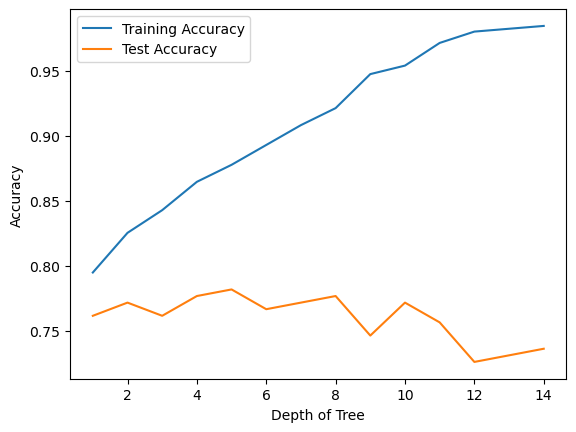

Ideal tree depth: 5


In [1741]:
tree_test_accuracy = train_dataset.find_ideal_tree_depth(X_train_transformed, y_train, X_test_transformed, y_test, range(1, 15))
ideal_depth_index = tree_test_accuracy.index(max(tree_test_accuracy))
ideal_depth = range(1, 15)[ideal_depth_index]
print(f"Ideal tree depth: {ideal_depth}")

In [1742]:
decision_tree = train_dataset.train_decision_tree(X_train_transformed, y_train)

ideal_depth = train_dataset.evaluate_model_decision(decision_tree, X_train_transformed, X_test_transformed, y_train, y_test, tree_test_accuracy)
print(f"Ideal tree depth: {ideal_depth}")

Decision Tree Accuracy:
Training set accuracy: 0.8777
Testing set accuracy: 0.7868
Ideal tree depth: 5


# 9. Based on the results of k-nearest neighbor, and logistic regression, what is the best model to classify the data? Provide explanation to support your argument. 

1. Testing Set Accuracy Comparison: The decision tree model achieves the highest testing set accuracy (78.68%) compared to both KNN (75.63%) and logistic regression (76.65%).

2. Training Set Accuracy: The decision tree's training set accuracy is 87.77%, which is higher than both KNN (85.59%) and logistic regression (81.88%). 

Conclusion: Based on the provided results, the decision tree model emerges as the optimal choice for classifying the data. It not only achieves the highest testing set accuracy but also exhibits superior training set accuracy. Additionally, the decision tree strikes a balance between model complexity and interpretability, making it well-suited for the classification task. Therefore, the decision tree model stands out as the preferred option for this dataset.


# 10. Show some interesting graphs of the data, i.e., that can describe the original data. 

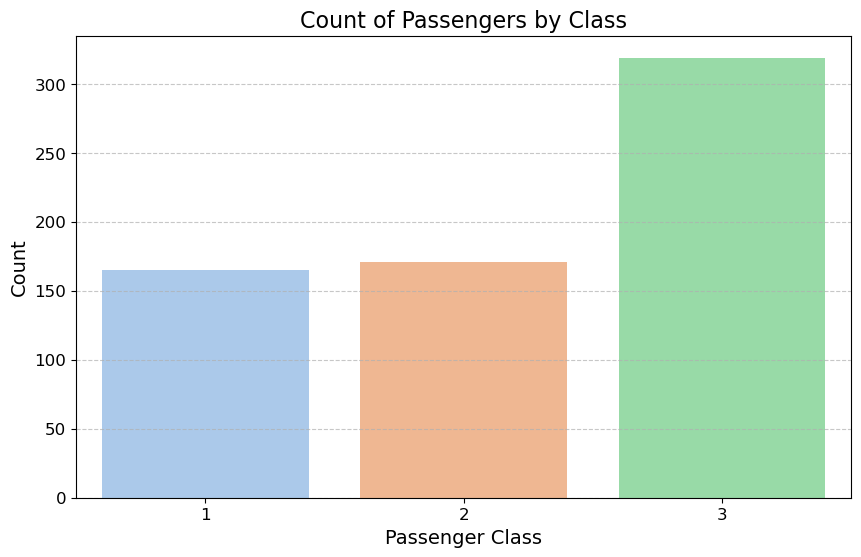

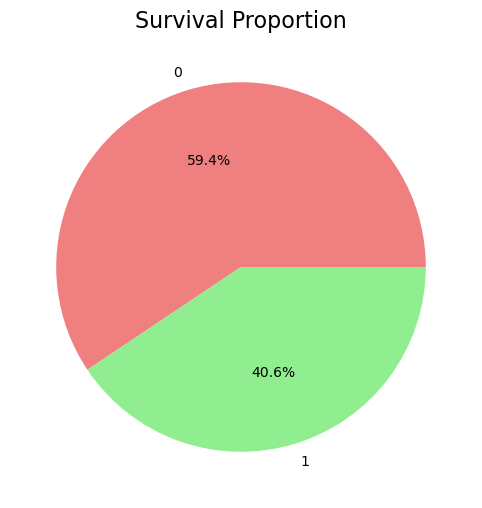

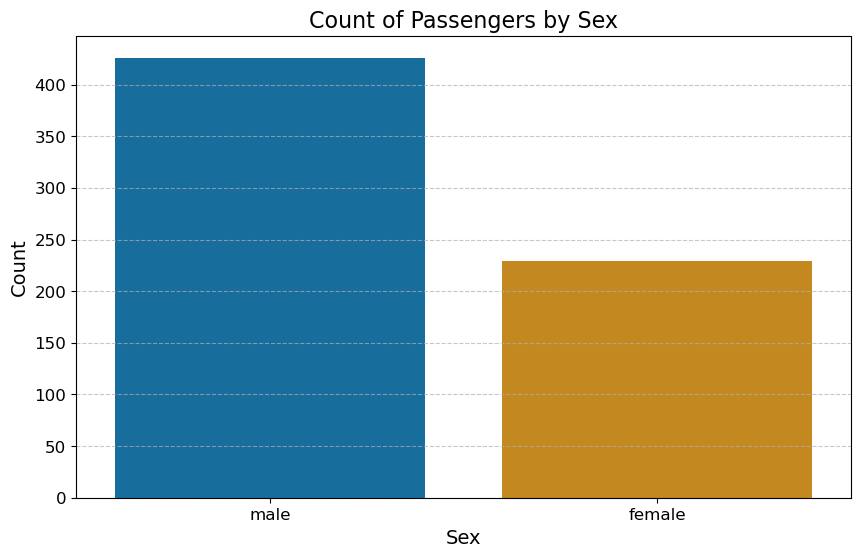

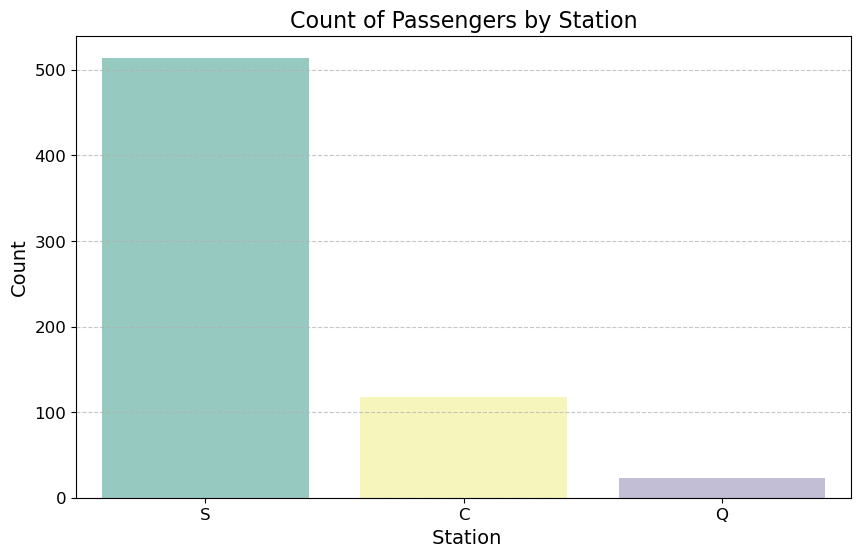

In [1744]:
train_dataset.visualize_data()